In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)

## Read data

In [19]:
url = 'https://raw.githubusercontent.com/aladelca/house_pricing_deep_learning/main/train.csv'
url = 'house_pricing_deep_learning/data/train.csv'
data = pd.read_csv(url)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratory data analysis

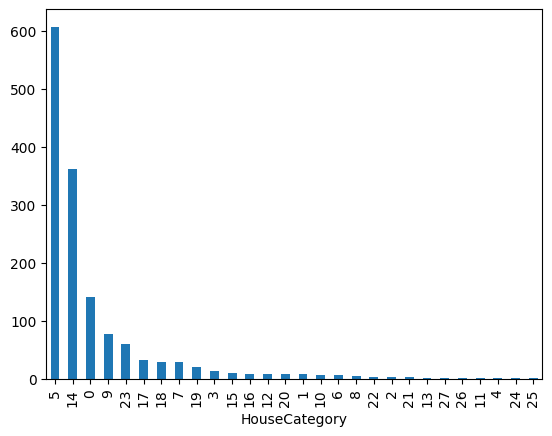

In [115]:
### Creating the new categorical target variable
data['HouseAge'] = data['YrSold'] - data['YearBuilt']
data['RemodAge'] = data['YrSold'] - data['YearRemodAdd']
data['HouseStyle'] = data['HouseStyle'].astype(str)
data['BldgType'] = data['BldgType'].astype(str)
data['HouseCategory'] = (data['HouseStyle'] + '_' + data['BldgType'] #+ 
                          #'_' + pd.cut(data['HouseAge'], bins=3, labels=['New', 'Mid', 'Old']).astype(str) +
                          #'_' + pd.cut(data['RemodAge'], bins=3, labels=['Recent', 'Older', 'Oldest']).astype(str))
)
enc = LabelEncoder()

data['HouseCategory'] = enc.fit_transform(data['HouseCategory'])
data['HouseCategory'].value_counts().plot(kind = 'bar')
plt.show()

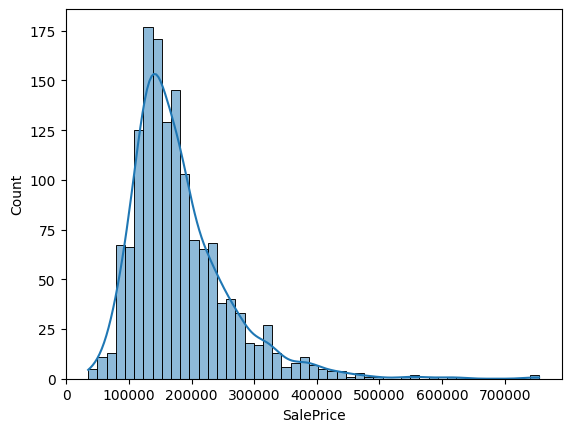

In [116]:
sns.histplot(data['SalePrice'], kde=True)
plt.show()

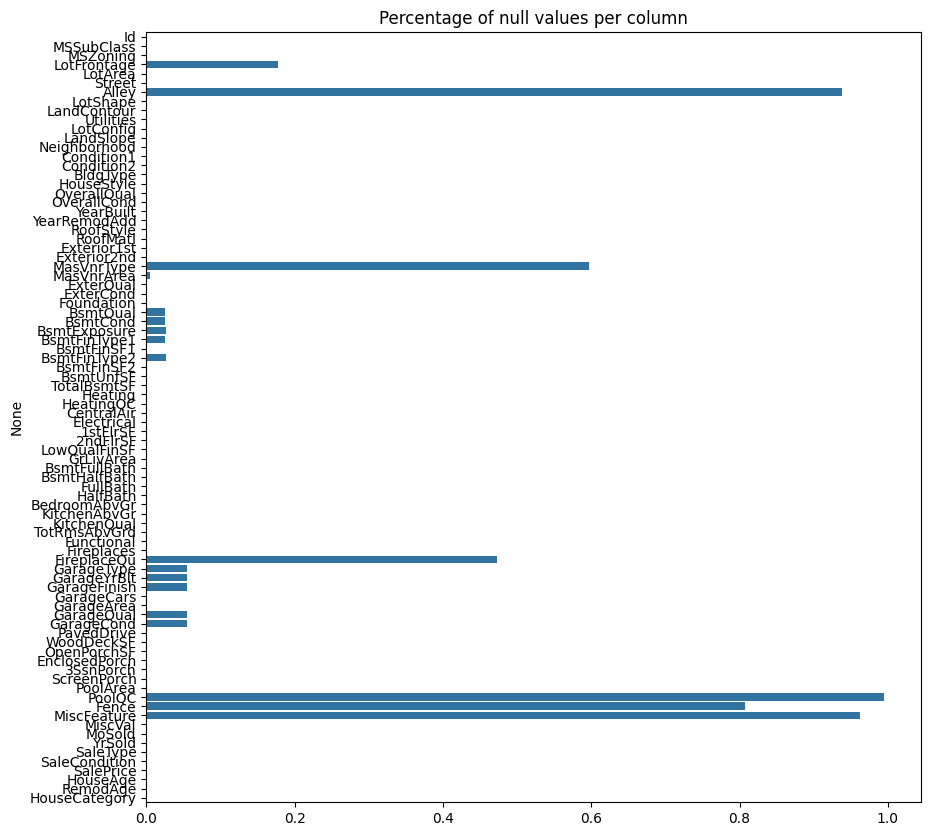

In [117]:
null = data.isna().mean()
plt.figure(figsize=(10, 10))
sns.barplot(y = null.index, x = null.values)
plt.title('Percentage of null values per column')
plt.show()

<Axes: >

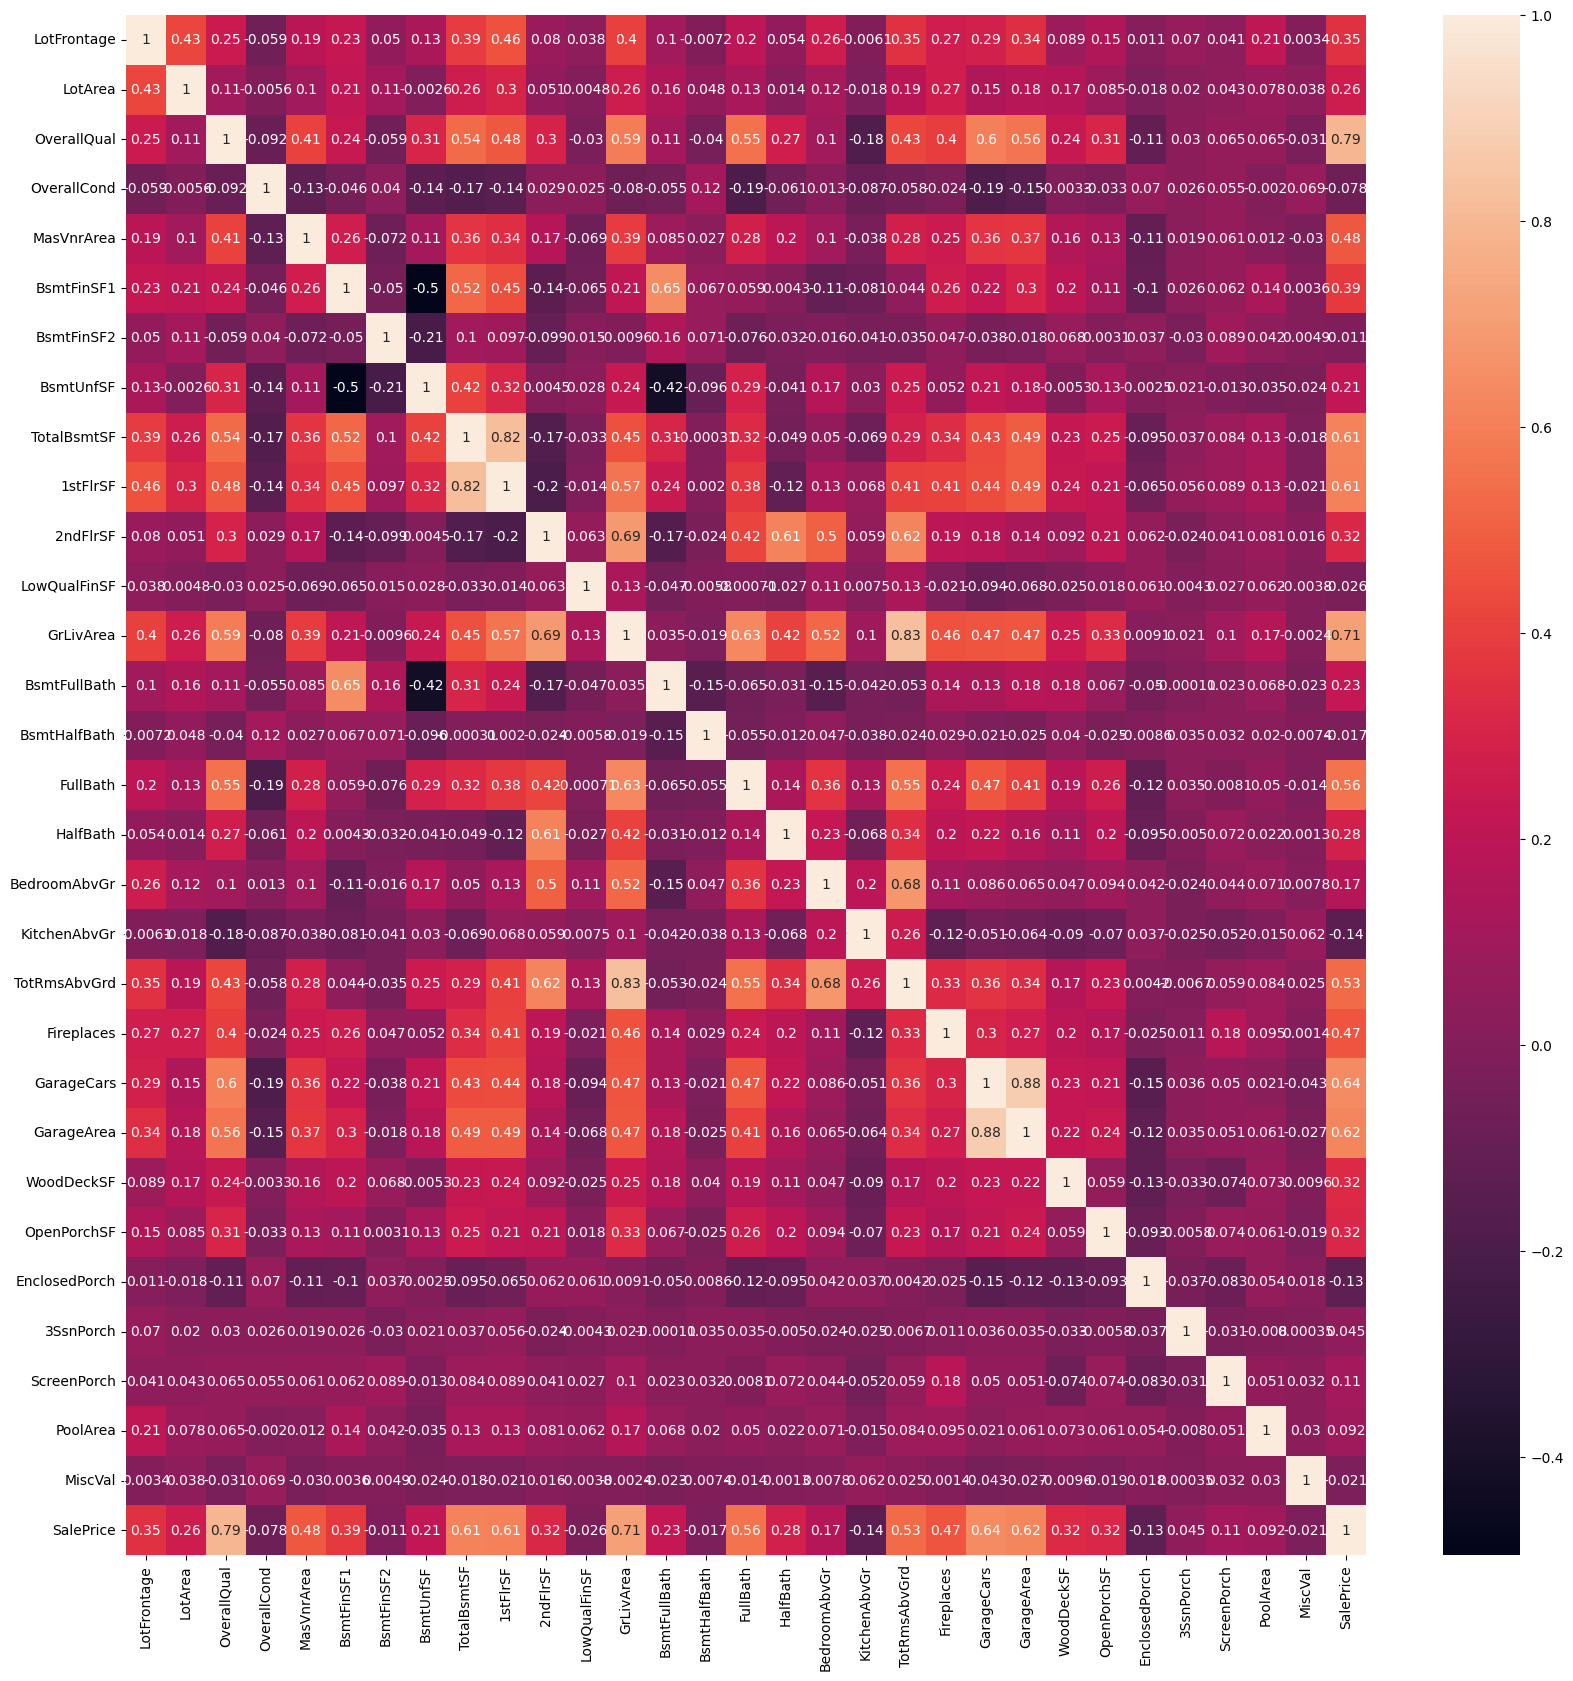

In [118]:
NUMERICAL_VARIABLES = [
    'LotFrontage',
    'LotArea',
    'OverallQual',
    'OverallCond',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageCars',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'SalePrice'
    ]
plt.figure(figsize=(20, 20))
sns.heatmap(data[NUMERICAL_VARIABLES].corr(), annot=True)

## Modelling

In [120]:

y = data[['SalePrice','HouseCategory']]
x = data.drop(columns=['SalePrice','HouseCategory'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
x_fit, x_val, y_fit, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=123)


In [121]:
#### Selecting variables

VARS = [
    'LotFrontage',
    'LotArea',
    'OverallQual',
    'OverallCond',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageCars',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'MSZoning',
    'Street',
    'LotShape',
    'LandContour',
    'Utilities',
    'LotConfig',
    'LandSlope',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'Foundation',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'Heating',
    'HeatingQC',
    'CentralAir',
    'Electrical',
    'KitchenQual',
    'Functional',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PavedDrive'
    ]

CATEGORICAL_VARIABLES_MODEL = [i for i in VARS if not i in NUMERICAL_VARIABLES]
NUMERICAL_VARIABLES_MODEL = [i for i in VARS if i in NUMERICAL_VARIABLES]


In [122]:
### Preprocessing pipeline

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer_cat", SimpleImputer(strategy='most_frequent')),
        ('encoding', OrdinalEncoder(handle_unknown=  'use_encoded_value', unknown_value = -1)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, NUMERICAL_VARIABLES_MODEL),
        ("cat", categorical_transformer, CATEGORICAL_VARIABLES_MODEL),
    ]
)

final_preprocessor = Pipeline(
    steps=[("preprocessor", preprocessor), ("scaler", MinMaxScaler())]
)

x_fit_preprocessed = final_preprocessor.fit_transform(x_fit)
x_test_preprocessed = final_preprocessor.transform(x_test)
x_val_preprocessed = final_preprocessor.transform(x_val)

### First experiment



In [180]:

import pytorch_lightning as pl
import torch
from torch import nn
from torch.nn import functional as F

class MultiTaskHouseModel(pl.LightningModule):
    def __init__(self, input_features, num_classes, activation_fn=nn.ReLU(), optimizer_type='Adam', lr=0.001):
        super().__init__()
        self.activation_fn = activation_fn
        self.optimizer_type = optimizer_type
        self.lr = lr
        self.shared_layers = nn.Sequential(
            nn.Linear(input_features, 256),
            self.activation_fn,
            nn.Linear(256, 128),  
            self.activation_fn,
            nn.Linear(128, 64),  
            self.activation_fn,
            nn.Linear(64, 32), 
            self.activation_fn
        )
        
        self.price_head = nn.Linear(32, 1)  
        self.category_head = nn.Linear(32, num_classes)  

        # Loss functions
        self.regression_loss = nn.MSELoss()
        self.classification_loss = nn.CrossEntropyLoss()

    def forward(self, x):
        shared_output = self.shared_layers(x)
        price = self.price_head(shared_output)
        category = self.category_head(shared_output)
        return price, category

    def training_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        pred_price, pred_category = self(x)
        
        loss_price = self.regression_loss(pred_price.squeeze(), y_price)
        loss_category = self.classification_loss(pred_category, y_category)
        total_loss = loss_price + loss_category  # Summation of losses
        self.log('train_loss', total_loss)
        return total_loss

    def validation_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        pred_price, pred_category = self(x)
        loss_price = self.regression_loss(pred_price.squeeze(), y_price)
        loss_category = self.classification_loss(pred_category, y_category)
        total_loss = loss_price + loss_category  # Summation of losses
        self.log('val_loss', total_loss)
        return {'val_loss': total_loss}
    def predict_step(self, batch, batch_idx, dataloader_idx=0):
        x = batch[0]
        pred_price, pred_category = self(x)
        pred_category_prob = F.softmax(pred_category, dim=1) 
        return pred_price, pred_category_prob

    def configure_optimizers(self):
        if self.optimizer_type == 'Adam':
            return torch.optim.Adam(self.parameters(), lr=self.lr)
        elif self.optimizer_type == 'SGD':
            return torch.optim.SGD(self.parameters(), lr=self.lr, momentum=0.9)  # Asumiendo que quieres usar momentum
        elif self.optimizer_type == 'RMSprop':
            return torch.optim.RMSprop(self.parameters(), lr=self.lr)
        else:
            raise ValueError("Unsupported optimizer type")


In [174]:
from torch.utils.data import DataLoader, TensorDataset
train_dataset = TensorDataset(torch.tensor(x_fit_preprocessed, dtype=torch.float),
                              torch.tensor(y_fit['SalePrice'].values, dtype=torch.float),
                              torch.tensor(y_fit['HouseCategory'].values, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(torch.tensor(x_val_preprocessed, dtype=torch.float),
                            torch.tensor(y_val['SalePrice'].values, dtype=torch.float),
                            torch.tensor(y_val['HouseCategory'].values, dtype=torch.long))
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset = TensorDataset(torch.tensor(x_test_preprocessed, dtype=torch.float))
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)


In [181]:
from pytorch_lightning import Trainer
trainer = Trainer(max_epochs=100)
model = MultiTaskHouseModel(input_features=x_fit_preprocessed.shape[1], num_classes=len(y_fit['HouseCategory'].unique()), optimizer_type='Adam')
trainer.fit(model, train_loader, val_loader)


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type             | Params
---------------------------------------------------------
0 | activation_fn       | ReLU             | 0     
1 | shared_layers       | Sequential       | 59.1 K
2 | price_head          | Linear           | 33    
3 | category_head       | Linear           | 891   
4 | regression_loss     | MSELoss          | 0     
5 | classification_loss | CrossEntropyLoss | 0     
---------------------------------------------------------
60.0 K    Trainable params
0         Non-trainable params
60.0 K    Total params
0.240     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 30/30 [00:00<00:00, 95.50it/s, v_num=27]         

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 30/30 [00:00<00:00, 92.63it/s, v_num=27]


In [182]:
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_absolute_percentage_error
def get_metrics(trainer, model, test_loader, y_test):
    total_preds = trainer.predict(model, dataloaders=test_loader)[0]
    mae = mean_absolute_error(total_preds[0], y_test['SalePrice'])
    mape = mean_absolute_percentage_error(total_preds[0], y_test['SalePrice'])
    classification_preds = []
    for i in total_preds[1]:
        classification_preds.append(np.argmax(i))
    accuracy = accuracy_score(classification_preds, y_test['HouseCategory'])
    metrics = {'mae': mae, 'mape': mape, 'accuracy': accuracy}
    return metrics

get_metrics(trainer, model, test_loader, y_test)


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 326.81it/s]


{'mae': 18508.454048052226,
 'mape': 0.10552734640186026,
 'accuracy': 0.3972602739726027}


### Experimentation

In [188]:

activations = [nn.ReLU(),nn.LeakyReLU(), nn.Sigmoid(), nn.Tanh()]
activation_names = ['ReLU', 'LeakyReLU', 'Sigmoid', 'Tanh']
optimizer_names = ['Adam', 'RMSprop']

final_metrics = {}

for activation in activations:
    for optimizer in optimizer_names:
        print(activation, optimizer)
        model = MultiTaskHouseModel(input_features=x_fit_preprocessed.shape[1], num_classes=len(y_fit['HouseCategory'].unique()), activation_fn=activation, optimizer_type=optimizer)
        trainer = Trainer(max_epochs=100)
        trainer.fit(model, train_loader)
        metrics = get_metrics(trainer, model, test_loader, y_test)
        final_metrics[(activation, optimizer)] = metrics

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type             | Params
---------------------------------------------------------
0 | activation_fn       | ReLU             | 0     
1 | shared_layers       | Sequential       | 59.1 K
2 | price_head          | Linear           | 33    
3 | category_head       | Linear           | 891   
4 | regression_loss     | MSELoss          | 0     
5 | classification_loss | CrossEntropyLoss | 0     
---------------------------------------------------------
60.0 K    Trainable params
0         Non-trainable params
60.0 K    Total params
0.240     Total estimated model params size (MB)


ReLU() Adam
Epoch 99: 100%|██████████| 30/30 [00:00<00:00, 121.78it/s, v_num=48]

`Trainer.fit` stopped: `max_epochs=100` reached.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 513.94it/s]


GPU available: True (mps), used: True


ReLU() RMSprop


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type             | Params
---------------------------------------------------------
0 | activation_fn       | ReLU             | 0     
1 | shared_layers       | Sequential       | 59.1 K
2 | price_head          | Linear           | 33    
3 | category_head       | Linear           | 891   
4 | regression_loss     | MSELoss          | 0     
5 | classification_loss | CrossEntropyLoss | 0     
---------------------------------------------------------
60.0 K    Trainable params
0         Non-trainable params
60.0 K    Total params
0.240     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 30/30 [00:00<00:00, 143.44it/s, v_num=49]

`Trainer.fit` stopped: `max_epochs=100` reached.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 496.25it/s]
LeakyReLU(negative_slope=0.01) Adam


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type             | Params
---------------------------------------------------------
0 | activation_fn       | LeakyReLU        | 0     
1 | shared_layers       | Sequential       | 59.1 K
2 | price_head          | Linear           | 33    
3 | category_head       | Linear           | 891   
4 | regression_loss     | MSELoss          | 0     
5 | classification_loss | CrossEntropyLoss | 0     
---------------------------------------------------------
60.0 K    Trainable params
0         Non-trainable params
60.0 K    Total params
0.240     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 30/30 [00:00<00:00, 115.55it/s, v_num=50]

`Trainer.fit` stopped: `max_epochs=100` reached.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 486.63it/s]


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


LeakyReLU(negative_slope=0.01) RMSprop


HPU available: False, using: 0 HPUs

  | Name                | Type             | Params
---------------------------------------------------------
0 | activation_fn       | LeakyReLU        | 0     
1 | shared_layers       | Sequential       | 59.1 K
2 | price_head          | Linear           | 33    
3 | category_head       | Linear           | 891   
4 | regression_loss     | MSELoss          | 0     
5 | classification_loss | CrossEntropyLoss | 0     
---------------------------------------------------------
60.0 K    Trainable params
0         Non-trainable params
60.0 K    Total params
0.240     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 30/30 [00:00<00:00, 129.89it/s, v_num=51]

`Trainer.fit` stopped: `max_epochs=100` reached.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 444.64it/s]
Sigmoid() Adam


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type             | Params
---------------------------------------------------------
0 | activation_fn       | Sigmoid          | 0     
1 | shared_layers       | Sequential       | 59.1 K
2 | price_head          | Linear           | 33    
3 | category_head       | Linear           | 891   
4 | regression_loss     | MSELoss          | 0     
5 | classification_loss | CrossEntropyLoss | 0     
---------------------------------------------------------
60.0 K    Trainable params
0         Non-trainable params
60.0 K    Total params
0.240     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 30/30 [00:00<00:00, 102.26it/s, v_num=52]

`Trainer.fit` stopped: `max_epochs=100` reached.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 485.68it/s]
Sigmoid() RMSprop


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type             | Params
---------------------------------------------------------
0 | activation_fn       | Sigmoid          | 0     
1 | shared_layers       | Sequential       | 59.1 K
2 | price_head          | Linear           | 33    
3 | category_head       | Linear           | 891   
4 | regression_loss     | MSELoss          | 0     
5 | classification_loss | CrossEntropyLoss | 0     
---------------------------------------------------------
60.0 K    Trainable params
0         Non-trainable params
60.0 K    Total params
0.240     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 30/30 [00:00<00:00, 137.61it/s, v_num=53]

`Trainer.fit` stopped: `max_epochs=100` reached.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 543.09it/s]
Tanh() Adam


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type             | Params
---------------------------------------------------------
0 | activation_fn       | Tanh             | 0     
1 | shared_layers       | Sequential       | 59.1 K
2 | price_head          | Linear           | 33    
3 | category_head       | Linear           | 891   
4 | regression_loss     | MSELoss          | 0     
5 | classification_loss | CrossEntropyLoss | 0     
---------------------------------------------------------
60.0 K    Trainable params
0         Non-trainable params
60.0 K    Total params
0.240     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 30/30 [00:00<00:00, 97.10it/s, v_num=54] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 418.76it/s]
Tanh() RMSprop


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type             | Params
---------------------------------------------------------
0 | activation_fn       | Tanh             | 0     
1 | shared_layers       | Sequential       | 59.1 K
2 | price_head          | Linear           | 33    
3 | category_head       | Linear           | 891   
4 | regression_loss     | MSELoss          | 0     
5 | classification_loss | CrossEntropyLoss | 0     
---------------------------------------------------------
60.0 K    Trainable params
0         Non-trainable params
60.0 K    Total params
0.240     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 30/30 [00:00<00:00, 120.79it/s, v_num=55]

`Trainer.fit` stopped: `max_epochs=100` reached.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 436.82it/s]


In [187]:
final_metrics

{(ReLU(), 'Adam'): {'mae': 30305.42853702911,
  'mape': 0.15756730334130536,
  'accuracy': 0.11643835616438356},
 (ReLU(), 'RMSprop'): {'mae': 24827.865047089042,
  'mape': 0.1273940966059759,
  'accuracy': 0.05136986301369863},
 (LeakyReLU(negative_slope=0.01), 'Adam'): {'mae': 28348.942262414384,
  'mape': 0.14723986716265391,
  'accuracy': 0.3972602739726027},
 (LeakyReLU(negative_slope=0.01), 'RMSprop'): {'mae': 27896.97977311644,
  'mape': 0.14112295978739933,
  'accuracy': 0.2534246575342466},
 (Sigmoid(), 'Adam'): {'mae': 181723.01322858626,
  'mape': 12371.513542927069,
  'accuracy': 0.3972602739726027},
 (Sigmoid(), 'RMSprop'): {'mae': 181717.20253926108,
  'mape': 8864.46327196216,
  'accuracy': 0.3972602739726027},
 (Tanh(), 'Adam'): {'mae': 181714.13346844504,
  'mape': 7710.014090887707,
  'accuracy': 0.3972602739726027},
 (Tanh(), 'RMSprop'): {'mae': 181710.1539603978,
  'mape': 6596.106100671343,
  'accuracy': 0.3972602739726027}}